## 1. Подготовка данных

### Загрузка данных

Загружаем датасеты train.csv и test.csv, они содержит информацию о 891 и 418 пассажирах выборки соответственно

In [11]:
import pandas as pd
import numpy as np

train = pd.read_csv('Загрузки/train.csv')
test = pd.read_csv('Загрузки/test.csv')

print(train.shape, test.shape)

(891, 12) (418, 11)


### Конкатенация датасетов

Объединяем train и test в один DataFrame по ключу PassengerId

In [12]:
test['Survived'] = np.nan

data = pd.concat([train, test], ignore_index=True)
data = data.sort_values('PassengerId').reset_index(drop=True)

data.shape

(1309, 12)

### Преобразование типов данных

Преобразуем столбцы в правильные типы данных: Survived, Pclass и Sex должны быть категориальными

In [13]:
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

## 2. Анализ таблицы

### Базовая статистика

Выводим основные статистические показатели датасета

In [14]:
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,29.881138,0.498854,0.385027,33.295479
std,378.020061,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,80.000000,8.000000,9.000000,512.329200


### В каком классе было больше всего пассажиров?

In [15]:
class_counts = data['Pclass'].value_counts()
class_counts

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

Больше всего пассажиров было в 3 классе - 709 человек

### Группировка по классу и полу

Расчитаем средний возраст для каждой комбинации класса и пола

In [16]:
age_grouped = data.groupby(['Pclass', 'Sex'], observed=True)['Age'].mean()
print(age_grouped, age_grouped.max() - age_grouped.min(), sep='\n')

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64
18.843942575810384


- Самая молодая группа: 3 класс, женщины - 22.19 года
- Самая взрослая группа: 1 класс, мужчины - 41.03 год
- Разница: 18.84 лет

### Выжившие с фамилией на "K"

In [17]:
surv_k = data[(data['Survived'] == 1) & (data['Name'].str[0] == 'K')]
surv_k_sort = surv_k.sort_values('Fare', ascending=False)

print(len(surv_k_sort))
print(surv_k_sort[['Name', 'Fare']])

9
                                         Name     Fare
621              Kimball, Mr. Edwin Nelson Jr  52.5542
457         Kenyon, Mrs. Frederick R (Marion)  51.8625
316       Kantor, Mrs. Sinai (Miriam Sternin)  26.0000
184       Kink-Heilmann, Miss. Luise Gretchen  22.0250
706             Kelly, Mrs. Florence "Fannie"  13.5000
691                        Karun, Miss. Manca  13.4167
303                       Keane, Miss. Nora A  12.3500
300  Kelly, Miss. Anna Katherine "Annie Kate"   7.7500
573                         Kelly, Miss. Mary   7.7500


- Больше всех заплатил: Kimball, Mr. Edwin Nelson Jr - 52.55
- Меньше всех заплатила: Kelly, Miss. Mary - 7.75

## 3. Визуализация

Создаем 10 различных графиков на основе данных, 5 из них интерактивные, 1 трехмерный

График 1: Точечный график (интерактивный)

In [18]:
import plotly.express as px

fig = px.scatter(data, x='Age', y='Fare', color='Survived',
                 title='Зависимость стоимости билета от возраста',
                 labels={'Age': 'Возраст', 'Fare': 'Стоимость билета'})
fig.show()

График 2: Линейный график (интерактивный)

In [19]:
age_fare = data.groupby(['Age', 'Pclass'], observed=True)['Fare'].mean().reset_index()
fig = px.line(age_fare, x='Age', y='Fare', color='Pclass',
              title='Средняя стоимость билета по возрасту для разных классов')
fig.show()

График 3: Гистограмма

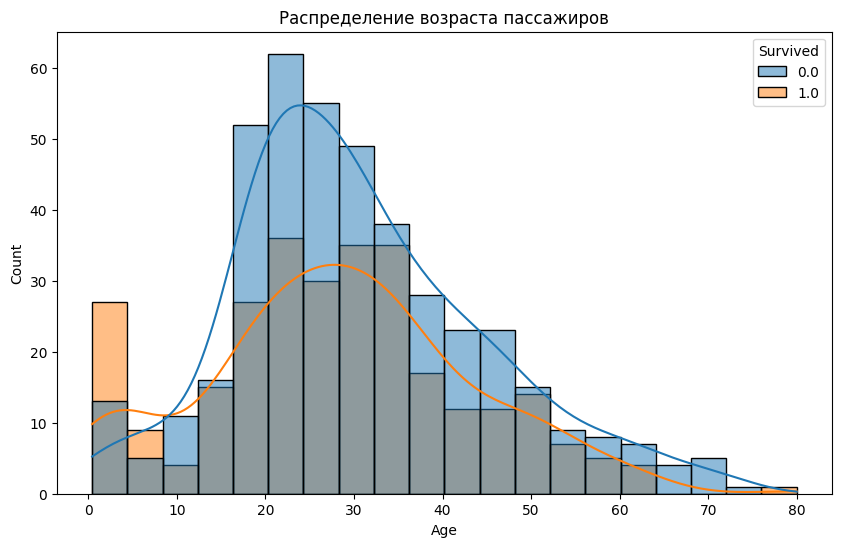

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data, x='Age', kde=True, hue='Survived')
plt.title('Распределение возраста пассажиров')
plt.show()

График 4: Столбчатая диаграмма (интерактивная)

In [21]:
class_survival = data.groupby('Pclass', observed=True)['Survived'].value_counts().reset_index(name='Count')
fig = px.bar(class_survival, x='Pclass', y='Count', color='Survived',
             title='Выживаемость по классам')
fig.show()

График 5: Горизонтальная столбчатая диаграмма (интерактивная)

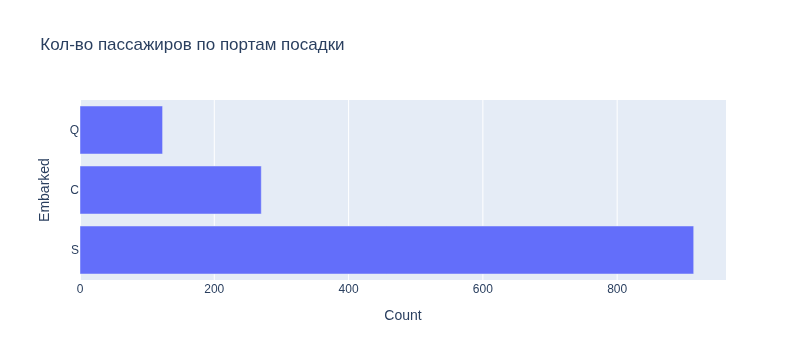

In [43]:
embarked_counts = data['Embarked'].value_counts().reset_index()
embarked_counts.columns = ['Embarked', 'Count']
fig = px.bar(embarked_counts, y='Embarked', x='Count', orientation='h',
             title='Кол-во пассажиров по портам посадки')
fig.show()

График 6: Круговая диаграмма

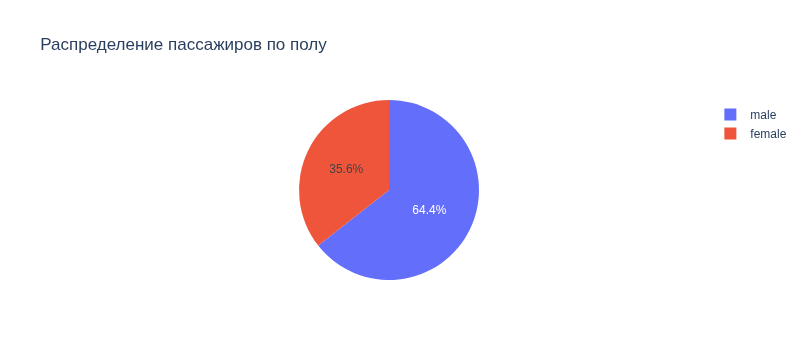

In [47]:
sex_counts = data['Sex'].value_counts().reset_index()
fig = px.pie(sex_counts, names='Sex', values='count',
             title='Распределение пассажиров по полу')
fig.show()

График 7: Прямоугольная диаграмма

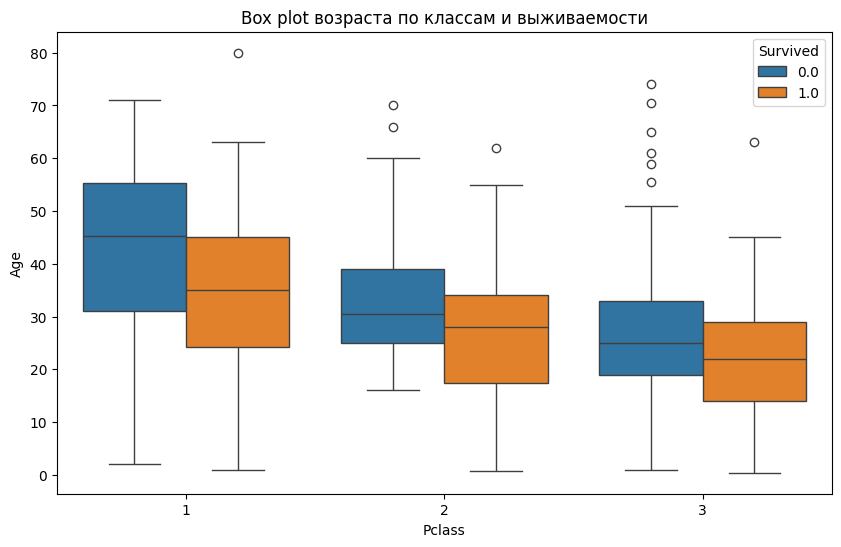

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='Pclass', y='Age', hue='Survived')
plt.title('Box plot возраста по классам и выживаемости')
plt.show()

График 8: Диаграмма солнечных лучей (интерактивная)

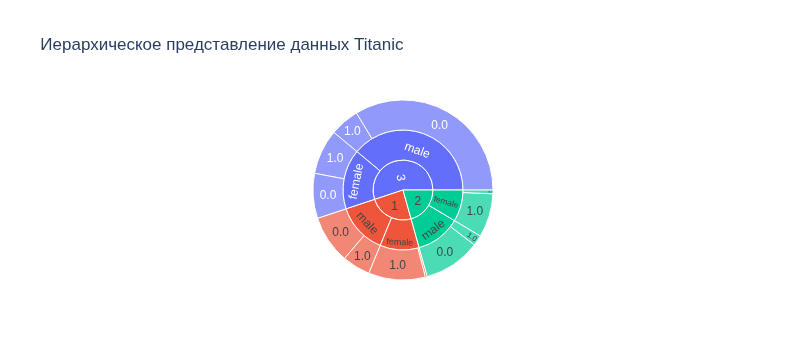

In [49]:
fig = px.sunburst(data.dropna(subset=['Pclass', 'Sex', 'Survived']), 
                  path=['Pclass', 'Sex', 'Survived'],
                  title='Иерархическое представление данных Titanic')
fig.show()

График 9: Точечный график (3d)

In [26]:
fig = px.scatter_3d(data.dropna(subset=['Age', 'Fare', 'Pclass']), 
                    x='Age', y='Fare', z='Pclass',
                    color='Survived',
                    title='3D визуализация: Возраст, Стоимость и Класс')
fig.show()


График 10: Тепловая карта

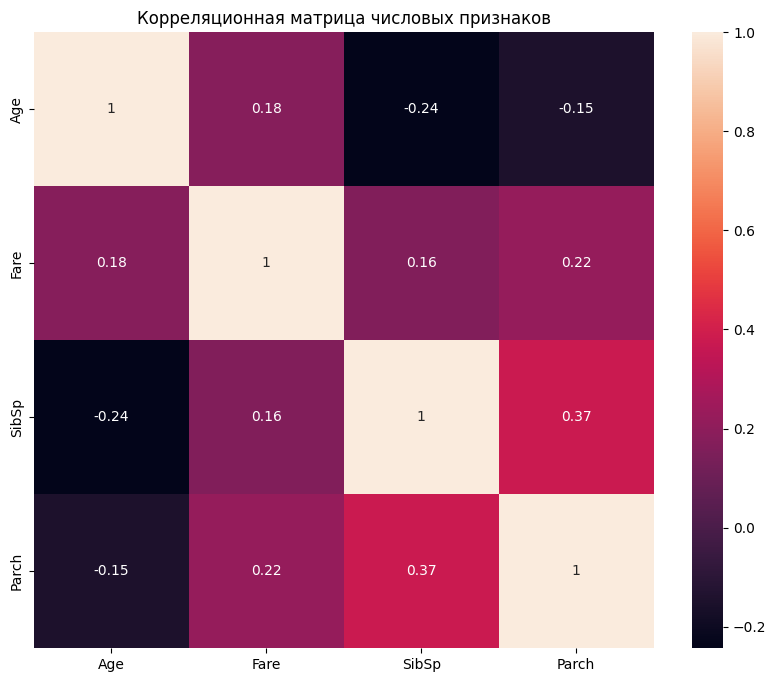

In [28]:
plt.figure(figsize=(10, 8))
corr_matrix = data[['Age', 'Fare', 'SibSp', 'Parch']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Корреляционная матрица числовых признаков')
plt.show()